# Training the machine learning model

In this notebook we're going to create a machine learning model and train it against the features that we engineered in the previous notebook.

We’ll be using a random forest classifier. This method is well suited as our data set will be comprised of a mix of strong and weak features. While the weak features will sometimes be helpful, the random forest method will ensure we don’t create a model that only fits our training data.

In [33]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.ensemble import RandomForestClassifier

Let's first load the features that we engineered in the previous notebook:

In [34]:
# Load the CSV files saved in the train/test notebook

df_train_under = pd.read_csv("data/df_train_under_all.csv")
df_test_under = pd.read_csv("data/df_test_under_all.csv")

In [35]:
df_train_under.sample(5)

,cn,node1,node2,pa,tn,label
10699,3.000,8502,8503,20.000,6.000,1
3976,0.000,9469,6270,25.000,10.000,0
817,0.000,13086,13086,9.000,3.000,0
7118,12.000,1317,5557,169.000,14.000,1
9638,0.000,5836,5837,4.000,5.000,1


In [36]:
df_test_under.sample(5)

,cn,node1,node2,pa,tn,label
12356,1.000,6623,6624,4.000,3.000,1
2694,0.000,9973,5720,6.000,5.000,0
13183,0.000,8886,9101,3.000,4.000,1
12885,1.000,8448,8449,4.000,3.000,1
6427,0.000,2324,14588,48.000,26.000,0


We can create our random forest classifier with the following code:

In [37]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

And now let's train the model:

In [38]:
columns = [
    "cn", "pa", "tn", # graph features
]

X = df_train_under[columns]
y = df_train_under["label"]
classifier.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

Next we're going to evaluate our model and see which features are the most influential. The following two functions will help us do this:

In [39]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall"],
        "Score": [accuracy_score(actual, predictions), 
                  precision_score(actual, predictions), 
                  recall_score(actual, predictions)]
    })

def feature_importance(columns, classifier):        
    display("Feature Importance")
    df = pd.DataFrame({
        "Feature": columns,
        "Importance": classifier.feature_importances_
    })
    df = df.sort_values("Importance", ascending=False)    
    ax = df.plot(kind='bar', x='Feature', y='Importance', legend=None)
    ax.xaxis.set_label_text("")
    plt.tight_layout()
    plt.show()

Now let's see how well our model does against the test set:

In [40]:
predictions = classifier.predict(df_test_under[columns])
y_test = df_test_under["label"]

evaluate_model(predictions, y_test)

,Measure,Score
0,Accuracy,0.912
1,Precision,0.905
2,Recall,0.920


In [41]:
evaluate_model(predictions, y_test).to_csv("data/model-eval.csv", index=False)

'Feature Importance'

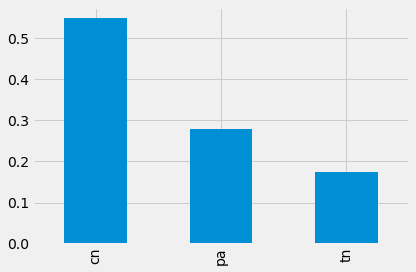

In [42]:
feature_importance(columns, classifier)